# AI502/KSE527, Homework 01

This file is made by Jaehoon Oh, which is modified based on https://github.com/floydhub/regression

In [1]:
import torch
import torch.nn as nn
import torch.utils.data

In [2]:
POLY_DEGREE = 4
torch.manual_seed(2020)
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5

In [3]:
def poly_desc(W, b):
    """Creates a string description of a polynomial."""
    result = ''
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, len(W) - i)
    result += '{:+.2f}'.format(b[0])
    return result

In [4]:
print('==> The real function you should approximate:\t' + poly_desc(W_target.view(-1), b_target))

==> The real function you should approximate:	+6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


---

In [5]:
def make_features(x):
    """Builds features i.e. a matrix with columns [x^4, x^3, x^2, x^1]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** (POLY_DEGREE+1-i) for i in range(1, POLY_DEGREE+1)], 1)

In [6]:
def f(x):
    """Approximated function."""
    return x.mm(W_target) + b_target[0]

In [7]:
def get_dataset(dataset_size):
    """Builds a batch i.e. (x, f(x)) pair."""
    random = torch.randn(dataset_size)
    x = make_features(random)
    y = f(x)
    dataset = list(zip(x, y))
    return dataset


In [8]:
dataset = get_dataset(200) # you can make as many as dataset as you want
print(dataset)

[(tensor([6.2834, 3.9687, 2.5067, 1.5832]), tensor([40.3072])), (tensor([ 1.8405, -1.5802,  1.3566, -1.1648]), tensor([36.2081])), (tensor([0.4151, 0.5172, 0.6443, 0.8027]), tensor([7.8166])), (tensor([ 0.8594, -0.8926,  0.9270, -0.9628]), tensor([23.1140])), (tensor([ 6.2216, -3.9393,  2.4943, -1.5793]), tensor([84.2530])), (tensor([ 0.0022, -0.0100,  0.0464, -0.2155]), tensor([5.2617])), (tensor([0.0490, 0.1042, 0.2215, 0.4706]), tensor([4.9531])), (tensor([0.0002, 0.0018, 0.0149, 0.1220]), tensor([4.2615])), (tensor([0.2548, 0.3587, 0.5048, 0.7105]), tensor([6.6989])), (tensor([ 0.0003, -0.0021,  0.0162, -0.1274]), tensor([4.7996])), (tensor([14.0503, -7.2571,  3.7484, -1.9361]), tensor([159.0084])), (tensor([0.4918, 0.5873, 0.7013, 0.8374]), tensor([8.3228])), (tensor([4.4075e-09, 5.4094e-07, 6.6389e-05, 8.1480e-03]), tensor([4.3868])), (tensor([ 0.0005, -0.0034,  0.0226, -0.1504]), tensor([4.9036])), (tensor([0.0005, 0.0035, 0.0231, 0.1521]), tensor([4.2574])), (tensor([17.5733, -

---

In [9]:
num_epochs =50
batch_size = 50
learning_rate = 0.1
criterion = nn.SmoothL1Loss()

In [10]:
dataset_loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

---

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(W_target.size(0), 1)
        
        # For fixing the initial weights and bias
        self.fc.weight.data.fill_(0.)
        self.fc.bias.data.fill_(0.)
        
    def forward(self, x):
        output = self.fc(x)
        return output

In [12]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on GPU")
else:
    device = torch.device("cpu")
    print("running on CPU")

running on GPU


In [13]:
import time
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.interpolate import interp1d

MODEL_NAME = f"model-{int(time.time())}"
print(MODEL_NAME)

def fit(model,loader,criterion,learning_rate,num_epochs):
    model.train()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    with open("model_0.1.log", "a") as f:
        
        for epoch in range(num_epochs):
            for i, data in enumerate(loader):
                if torch.cuda.is_available():
                    x = data[0].type(torch.FloatTensor).cuda()
                    y = data[1].type(torch.FloatTensor).cuda()
                else:
                    x = data[0].type(torch.FloatTensor)
                    y = data[1].type(torch.FloatTensor)   



                y_hat = model(x)
                loss = criterion(y_hat, y)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if epoch % 10 == 0:
                Real_function = poly_desc(W_target.view(-1), b_target)
                Learned_function = poly_desc(net.fc.weight.data.view(-1), net.fc.bias.data)
                print (Real_function)
                print (Learned_function)
                
                c1 = float(re.split("[( - +)]", Real_function)[-11])
                c2 = float(re.split("[( - +)]", Real_function)[-9])
                c3 = float(re.split("[( - +)]", Real_function)[-6])
                c4 = float(re.split("[( - +)]", Real_function)[-4])
                c5 = float(re.split("[( - +)]", Real_function)[-1])

                #coefficients of learned function
                C1 = float(re.split("[( - +)]", Learned_function)[-11])
                C2 = float(re.split("[( - +)]", Learned_function)[-9])
                C3 = float(re.split("[( - +)]", Learned_function)[-6])
                C4 = float(re.split("[( - +)]", Learned_function)[-4])
                C5 = float(re.split("[( - +)]", Learned_function)[-1])

                print (c1, c2, c3, c4, c5)
                print (C1, C2, C3, C4, C5)

                #Redifing functions for plotting in values form instead of string, so that we can input data
                
                x = np.linspace(-20, 20, num=200)

                Real_function = []
                Learned_function = []

                for i in x:
                    Real_function.append(c1*i**4 -c2*i**3 +c3*i**2 -c4*i**1 +c5)
                    Learned_function.append(C1*i**4 -C2*i**3 +C3*i**2 -C4*i**1 +C5)
                
                #Real_function.append(c1*x[i]**4 -c2*x[i]**3 +c3*x[i]**2 -c4*x[i]**1 +c5)
                #Learned_function.append(C1*x[i]**4 -C2*x[i]**3 +C3*x[i]**2 -C4*x[i]**1 +C5)

                #model_name = "model-1585490285" #or MODEL_NAME

                fig = plt.figure() #for multiple figurs, for one thing just use plt.plot(times, accuracies) and plt.show()
                plt.figure(figsize=(20,20))
                plt.rcParams.update({'font.size': 22})

                #f = interp1d(epochs, losses)
                #define axis, each axis is a graph
                ax1 = plt.subplot2grid((2,1), (0,0))
                #ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

                ax1.plot(Real_function, label="real function")
                ax1.plot(Learned_function, label="learned function")
                ax1.legend(loc=2)
                #ax2.plot(epochs, f(epochs), label="loss_smoothed") #smoothed plot
                #ax2.plot(epochs,val_losses, label="val_loss")
                #ax2.legend(loc=2)

                plt.show() 


model-1585898718


---

In [14]:
net = Net().cuda() if torch.cuda.is_available() else Net()
print('==> Initial function:\t' + poly_desc(net.fc.weight.data.view(-1), net.fc.bias.data))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

==> Initial function:	+0.00 x^4 +0.00 x^3 +0.00 x^2 +0.00 x^1 +0.00
==> Actual function:	+6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


+6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40
+1.38 x^4 -0.10 x^3 +0.41 x^2 -0.01 x^1 +0.40
6.19 -4.8 7.71 -2.04 4.4
1.38 -0.1 0.41 -0.01 0.4


<Figure size 432x288 with 0 Axes>

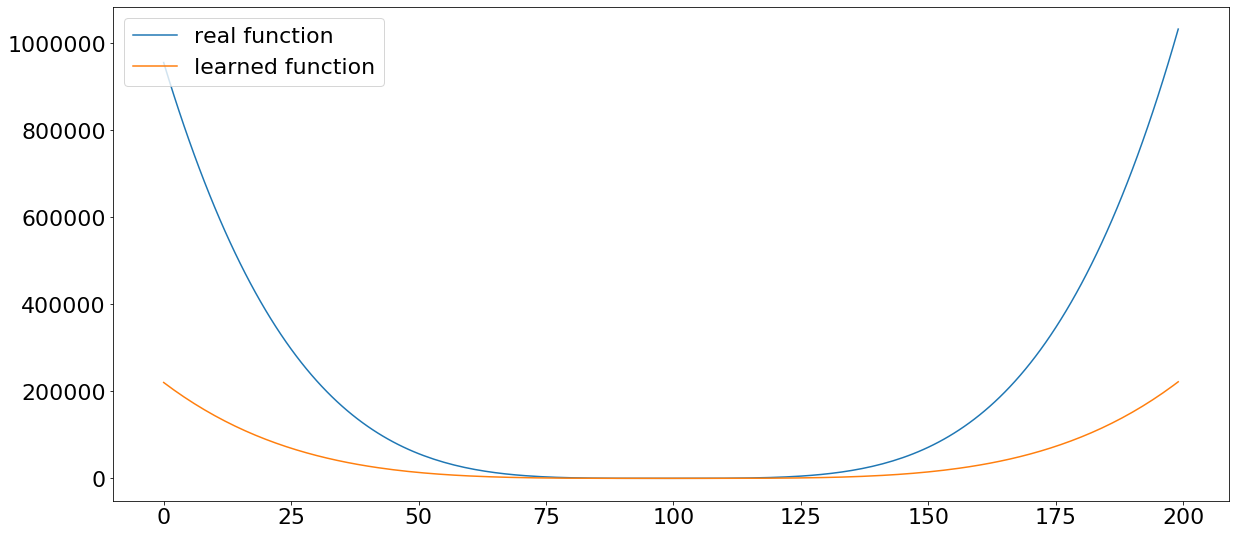

+6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40
+6.86 x^4 -3.36 x^3 +2.68 x^2 -0.93 x^1 +3.86
6.19 -4.8 7.71 -2.04 4.4
6.86 -3.36 2.68 -0.93 3.86


<Figure size 432x288 with 0 Axes>

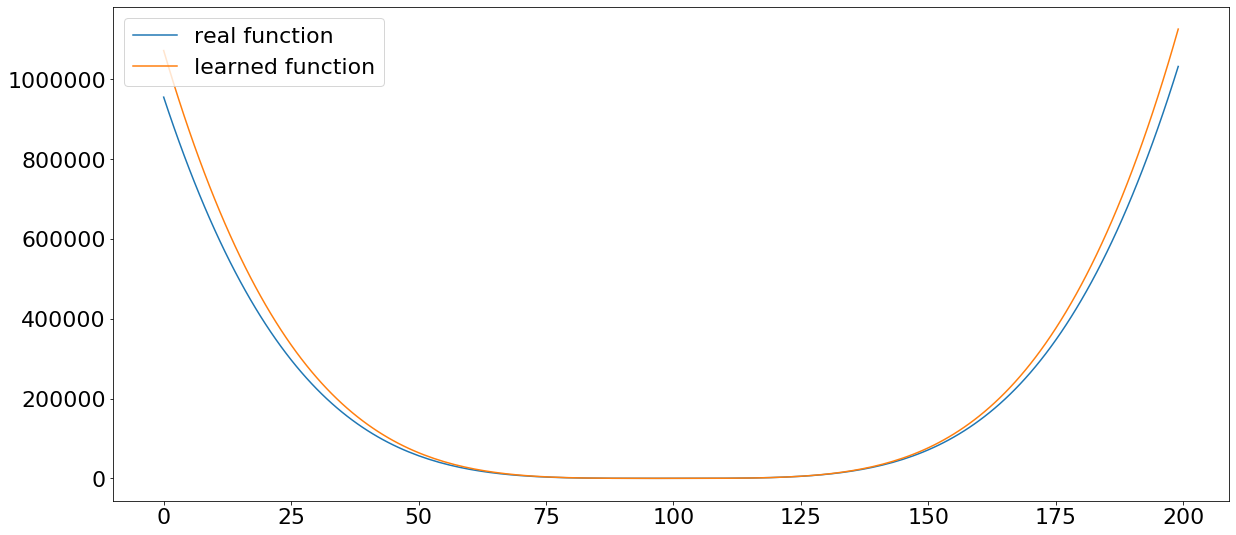

+6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40
+6.56 x^4 -4.73 x^3 +4.41 x^2 -1.60 x^1 +5.36
6.19 -4.8 7.71 -2.04 4.4
6.56 -4.73 4.41 -1.6 5.36


<Figure size 432x288 with 0 Axes>

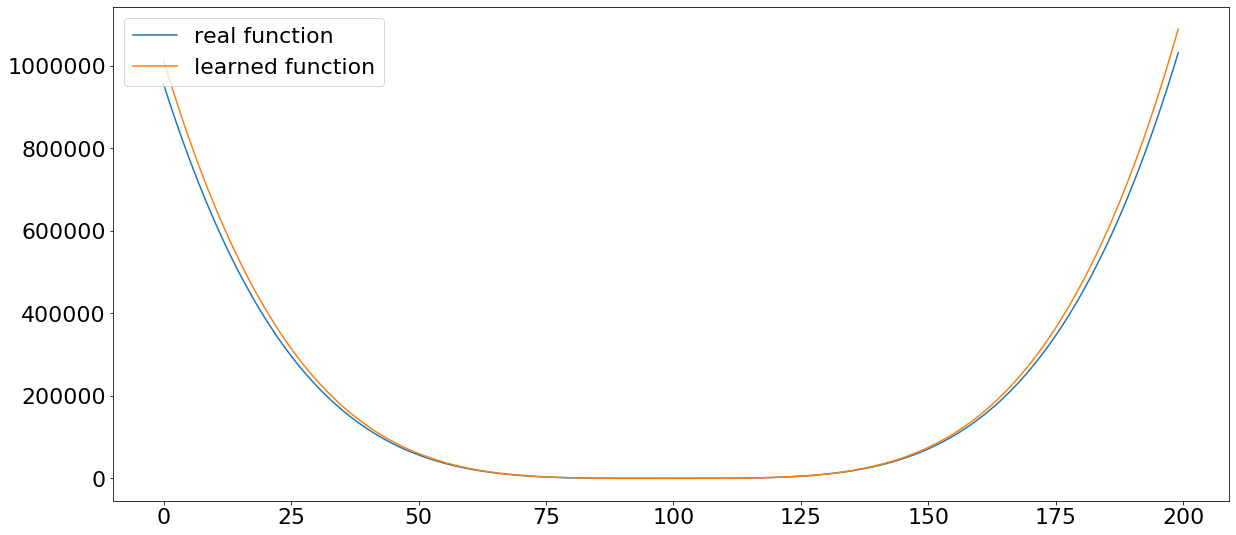

+6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40
+6.36 x^4 -4.69 x^3 +5.98 x^2 -2.09 x^1 +5.23
6.19 -4.8 7.71 -2.04 4.4
6.36 -4.69 5.98 -2.09 5.23


<Figure size 432x288 with 0 Axes>

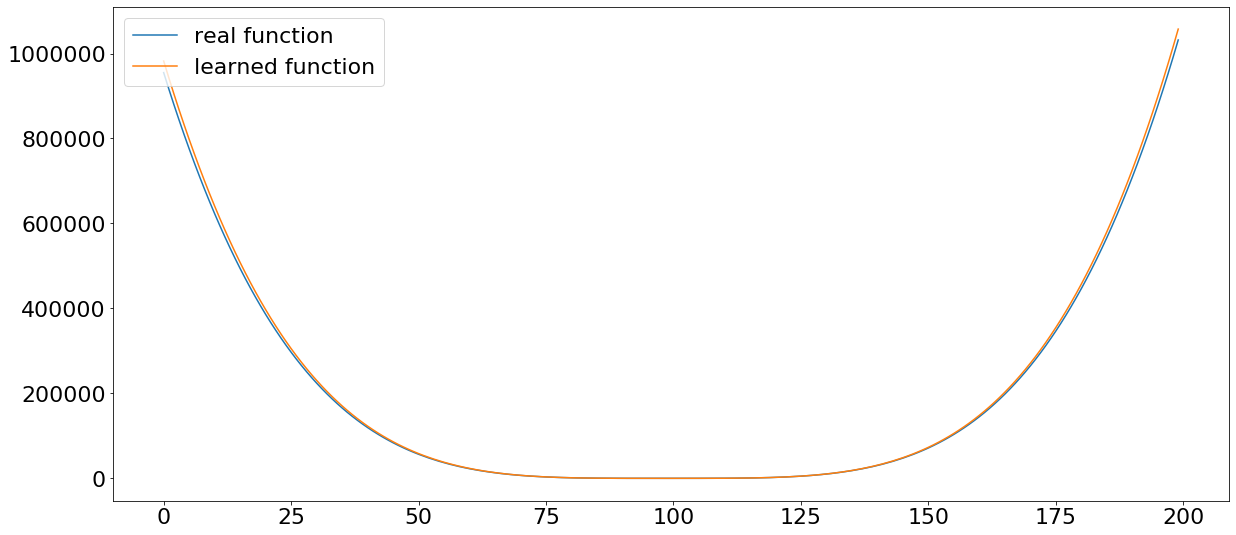

+6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40
+6.38 x^4 -4.76 x^3 +6.87 x^2 -2.21 x^1 +4.84
6.19 -4.8 7.71 -2.04 4.4
6.38 -4.76 6.87 -2.21 4.84


<Figure size 432x288 with 0 Axes>

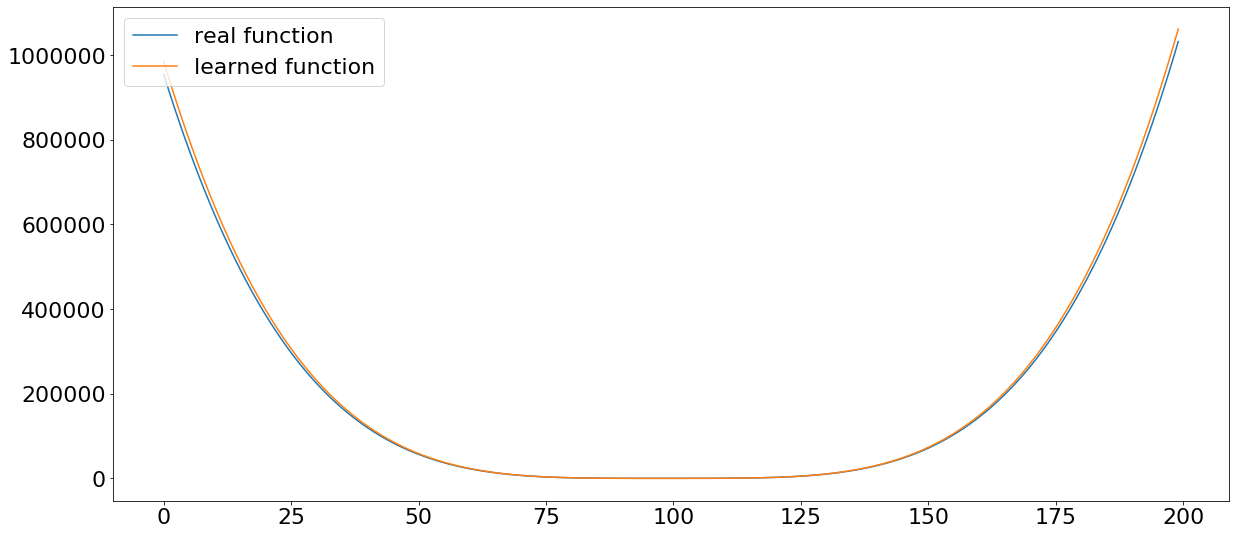

In [15]:
# train
fit(net,dataset_loader,criterion,learning_rate,num_epochs)


In [ ]:
print('==> Learned function:\t' + poly_desc(net.fc.weight.data.view(-1), net.fc.bias.data))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

In [28]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.interpolate import interp1d
style.use("ggplot")

x = np.linspace(-20, 20, num=200)

Real_function = []
Learned_function = []

for i in range(len(x)):
    Real_function.append(c1*x[i]**4 -c2*x[i]**3 +c3*x[i]**2 -c4*x[i]**1 +c5)
    Learned_function.append(C1*x[i]**4 -C2*x[i]**3 +C3*x[i]**2 -C4*x[i]**1 +C5)

#model_name = "model-1585490285" #or MODEL_NAME

fig = plt.figure() #for multiple figurs, for one thing just use plt.plot(times, accuracies) and plt.show()
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 22})

#f = interp1d(epochs, losses)
#define axis, each axis is a graph
ax1 = plt.subplot2grid((2,1), (0,0))
#ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

ax1.plot(x, Real_function, label="real function")
ax1.plot(x, Learned_function, label="learned function")
ax1.legend(loc=2)
#ax2.plot(epochs, f(epochs), label="loss_smoothed") #smoothed plot
#ax2.plot(epochs,val_losses, label="val_loss")
#ax2.legend(loc=2)
    
plt.show() 

NameError: name 'c1' is not defined